<a href="https://colab.research.google.com/github/estebanvz/deep_learning_series_temporales/blob/aula-3/Aula03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerias

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU

# Dataset

In [ ]:
df_pasajeros = pd.read_csv("/content/alura-pasajeros.csv")
df_pasajeros.head()

,tiempo,pasajeros
0,2010.000000,112
1,2010.083333,118
2,2010.166667,132
3,2010.250000,129
4,2010.333333,121


In [ ]:
df_pasajeros.tail()

,tiempo,pasajeros
139,2021.583333,606
140,2021.666667,508
141,2021.750000,461
142,2021.833333,390
143,2021.916667,432


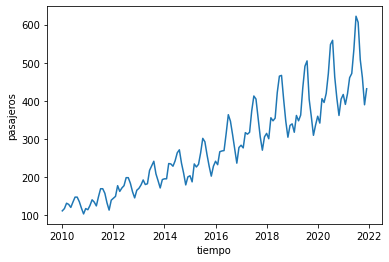

In [ ]:
sns.lineplot(data=df_pasajeros, x = "tiempo", y ="pasajeros")

In [ ]:
ss = StandardScaler()
dfn_pasajeros=ss.fit_transform(df_pasajeros)

In [ ]:
dfn_pasajeros[:5,:]

array([[-1.72006415, -1.40777884],
       [-1.69600731, -1.35759023],
       [-1.67195047, -1.24048348],
       [-1.64789363, -1.26557778],
       [-1.62383679, -1.33249593]])

In [ ]:
dfn_pasajeros[-5:,:]

array([[1.62383679, 2.72441656],
       [1.64789363, 1.9046693 ],
       [1.67195047, 1.5115252 ],
       [1.69600731, 0.91762667],
       [1.72006415, 1.26894693]])

In [ ]:
x = dfn_pasajeros[:,0]
y = dfn_pasajeros[:,1]

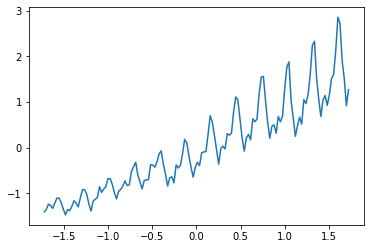

In [ ]:
sns.lineplot(x = x, y =y)

In [ ]:
split_n = int(0.9*len(x))
x_train = x[0:split_n]
x_test = x[split_n:]
y_train = y[0:split_n]
y_test = y[split_n:]
x_train.shape, y_test.shape

((129,), (15,))

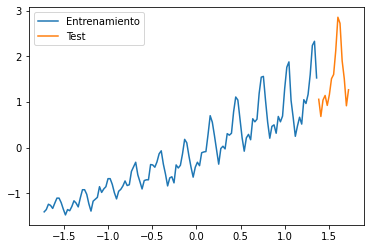

In [ ]:
sns.lineplot(x = x_train, y =y_train, label="Entrenamiento")
sns.lineplot(x = x_test, y =y_test, label="Test")

# Red Neuronal

In [ ]:
rn_lineal = Sequential()
rn_lineal.add( Dense(1, input_dim = 1, kernel_initializer = "ones", use_bias=True) )
rn_lineal.compile(loss="mean_squared_error", optimizer="adam")

In [ ]:
rn_lineal.fit(x_train,y_train)

5/5 [==============================] - 1s 4ms/step - loss: 0.1286


In [ ]:
y_predicted = rn_lineal.predict(x_train)
y_predicted.shape

(129, 1)

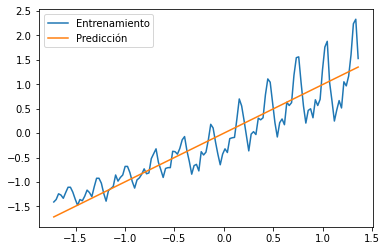

In [ ]:
sns.lineplot(x = x_train, y =y_train, label="Entrenamiento")
sns.lineplot(x = x_train, y =y_predicted.ravel(), label="Predicción")

In [ ]:
y_predicted_test = rn_lineal.predict(x_test)
y_predicted_test.shape

(15, 1)

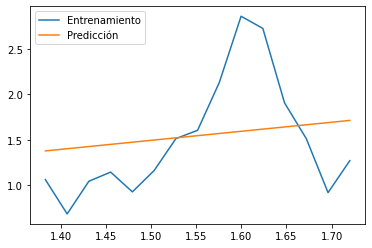

In [ ]:
sns.lineplot(x = x_test, y =y_test, label="Entrenamiento")
sns.lineplot(x = x_test, y =y_predicted_test.ravel(), label="Predicción")

## Transformación de datos

In [ ]:
def invertir_scala(tiempo,pasajeros,escalador):
  tmp = {"tiempo":tiempo,"pasajeros":pasajeros}
  df_tmp = pd.DataFrame(data=tmp)
  data_invertida = escalador.inverse_transform(df_tmp)
  df_final = pd.DataFrame(data_invertida)
  df_final.columns=["tiempo","pasajeros"]
  return df_final

In [ ]:
df_training = invertir_scala(x_train,y_predicted.ravel(), ss)
df_predicted = invertir_scala(x_test,y_predicted_test.ravel(), ss)

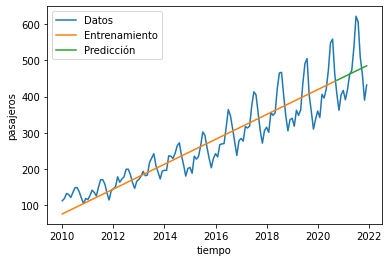

In [ ]:
sns.lineplot(data=df_pasajeros, x = "tiempo", y ="pasajeros", label="Datos")
sns.lineplot(data=df_training, x = "tiempo", y ="pasajeros", label="Entrenamiento")
sns.lineplot(data=df_predicted, x = "tiempo", y ="pasajeros", label="Predicción")

# Red Neuronal Compleja

In [ ]:
rn = Sequential()
rn.add( Dense(8, input_dim = 1) )
rn.add( Dense(8) )
rn.add( Dense(1) )
rn.compile(loss="mean_squared_error", optimizer="adam")
rn.fit(x_train,y_train, epochs=100)
y_predicted = rn.predict(x_train)
y_predicted_test = rn.predict(x_test)
df_training = invertir_scala(x_train,y_predicted.ravel(), ss)
df_predicted = invertir_scala(x_test,y_predicted_test.ravel(), ss)

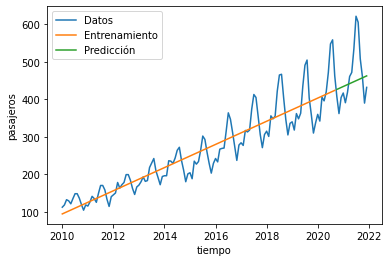

In [ ]:
sns.lineplot(data=df_pasajeros, x = "tiempo", y ="pasajeros", label="Datos")
sns.lineplot(data=df_training, x = "tiempo", y ="pasajeros", label="Entrenamiento")
sns.lineplot(data=df_predicted, x = "tiempo", y ="pasajeros", label="Predicción")

In [ ]:
rn_relu = Sequential()
rn_relu.add( Dense(8, input_dim = 1, activation="relu") )
rn_relu.add( Dense(8, activation="relu") )
rn_relu.add( Dense(1) )
rn_relu.compile(loss="mean_squared_error", optimizer="adam")
rn_relu.fit(x_train,y_train, epochs=100)
y_predicted = rn_relu.predict(x_train)
y_predicted_test = rn_relu.predict(x_test)
df_training = invertir_scala(x_train,y_predicted.ravel(), ss)
df_predicted = invertir_scala(x_test,y_predicted_test.ravel(), ss)

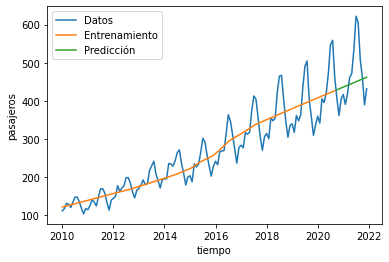

In [ ]:
sns.lineplot(data=df_pasajeros, x = "tiempo", y ="pasajeros", label="Datos")
sns.lineplot(data=df_training, x = "tiempo", y ="pasajeros", label="Entrenamiento")
sns.lineplot(data=df_predicted, x = "tiempo", y ="pasajeros", label="Predicción")

# Cambio de perspectiva

In [ ]:
def lag_variable(pasajeros,n_lag):
  x_train,y_train=[],[]
  for i in range(n_lag,len(pasajeros)):
    y_train.append(pasajeros[i])
    x_train.append(list(pasajeros[i-n_lag:i]))
  return x_train, y_train

In [ ]:
x_train_new,y_train_new = lag_variable(y_train,1)

In [ ]:
print(x_train_new[:5])
print(y_train_new[:5])

[[-1.4077788408280638], [-1.3575902326797062], [-1.2404834803335385], [-1.2655777844077172], [-1.3324959286055273]]
[-1.3575902326797062, -1.2404834803335385, -1.2655777844077172, -1.3324959286055273, -1.2153891762593596]


In [ ]:
rn_tanh = Sequential()
rn_tanh.add( Dense(8, input_dim = 1, activation="tanh") )
rn_tanh.add( Dense(8, activation="tanh") )
rn_tanh.add( Dense(1) )
rn_tanh.compile(loss="mean_squared_error", optimizer="adam")
rn_tanh.fit(x_train_new,y_train_new, epochs=100)
y_predicted_new = rn_tanh.predict(x_train_new)

In [ ]:
x_test_new,y_test_new = lag_variable(y_test,1)
y_predicted_test_new = rn_tanh.predict(x_test_new)

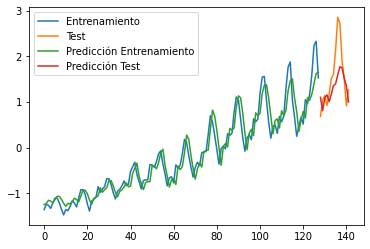

In [ ]:
rango1 = range(0,len(y_train_new))
rango2 = range(len(y_train_new),len(y_train_new)+len(y_test_new))
sns.lineplot(x=rango1, y=y_train_new,label="Entrenamiento")
sns.lineplot(x=rango2, y=y_test_new,label="Test")
sns.lineplot(x=rango1, y=y_predicted_new.ravel(),label="Predicción Entrenamiento")
sns.lineplot(x=rango2, y=y_predicted_test_new.ravel(),label="Predicción Test")

# Multiples Ventanas de Tiempo

In [ ]:
n_lag=3
x_train_new,y_train_new = lag_variable(y_train,n_lag)
rn_tanh = Sequential()
rn_tanh.add( Dense(8, input_dim = n_lag, activation="tanh") )
rn_tanh.add( Dense(64, activation="tanh") )
rn_tanh.add( Dense(1) )
rn_tanh.compile(loss="mean_squared_error", optimizer="adam")
rn_tanh.fit(x_train_new,y_train_new, epochs=200)
y_predicted_new = rn_tanh.predict(x_train_new)
x_test_new,y_test_new = lag_variable(y_test,n_lag)
y_predicted_test_new = rn_tanh.predict(x_test_new)

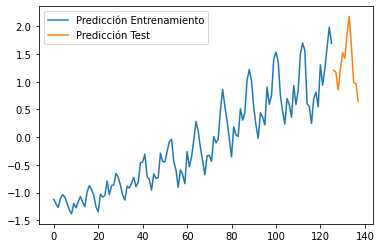

In [ ]:
rango1 = range(0,len(y_train_new))
rango2 = range(len(y_train_new),len(y_train_new)+len(y_test_new))
# sns.lineplot(x=rango1, y=y_train_new,label="Entrenamiento")
# sns.lineplot(x=rango2, y=y_test_new,label="Test")
sns.lineplot(x=rango1, y=y_predicted_new.ravel(),label="Predicción Entrenamiento")
sns.lineplot(x=rango2, y=y_predicted_test_new.ravel(),label="Predicción Test")

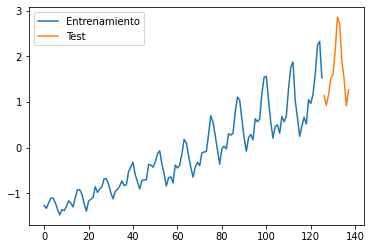

In [ ]:
sns.lineplot(x=rango1, y=y_train_new,label="Entrenamiento")
sns.lineplot(x=rango2, y=y_test_new,label="Test")